In [208]:
#importing necessary libraries
from flask import Flask,render_template,url_for,request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [209]:
#Read the dataset
df = pd.read_csv(r"Dataset\YoutubeSpamMergedData.csv")

In [210]:
#first five rows
df.head()

,Unnamed: 0,Unnamed: 1,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,Psy,0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,Psy,1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Psy,2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,Psy,3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,Psy,4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [211]:
#Last five rows
df.tail()

,Unnamed: 0,Unnamed: 1,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1951,Shakira,365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,Shakira,366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,Shakira,367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,Shakira,368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
1955,Shakira,369,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0


In [212]:
#dataset Shape
df.shape

(1956, 7)

In [213]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1956 non-null   object
 1   Unnamed: 1  1956 non-null   int64 
 2   COMMENT_ID  1956 non-null   object
 3   AUTHOR      1956 non-null   object
 4   DATE        1711 non-null   object
 5   CONTENT     1956 non-null   object
 6   CLASS       1956 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 107.1+ KB


In [214]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1951    False
1952    False
1953    False
1954    False
1955    False
Length: 1956, dtype: bool

In [215]:
#Let's print the total number of duplicated value
df.duplicated().sum()

0

In [216]:
#Let's print the unique values in our dataset
df.nunique()

Unnamed: 0       5
Unnamed: 1     448
COMMENT_ID    1953
AUTHOR        1792
DATE          1709
CONTENT       1760
CLASS            2
dtype: int64

In [217]:
#Let's print the data types in our data
df.dtypes

Unnamed: 0    object
Unnamed: 1     int64
COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [218]:
#Let's check the total number of null values present in our dataset 
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      0
COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

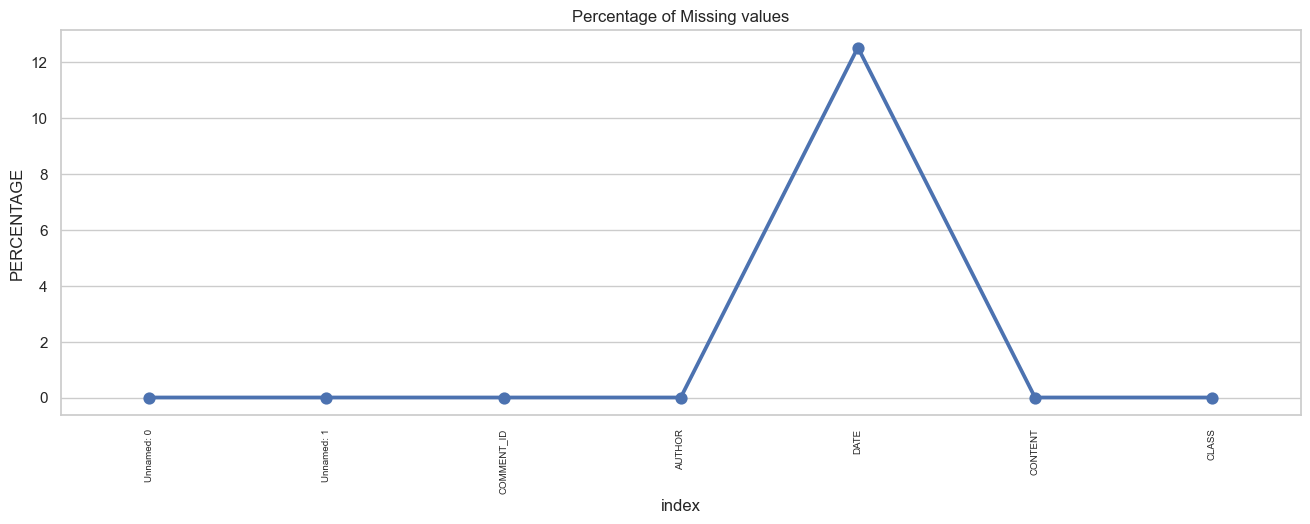

In [219]:
#plot the graph to check wether there are any missing value present

missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

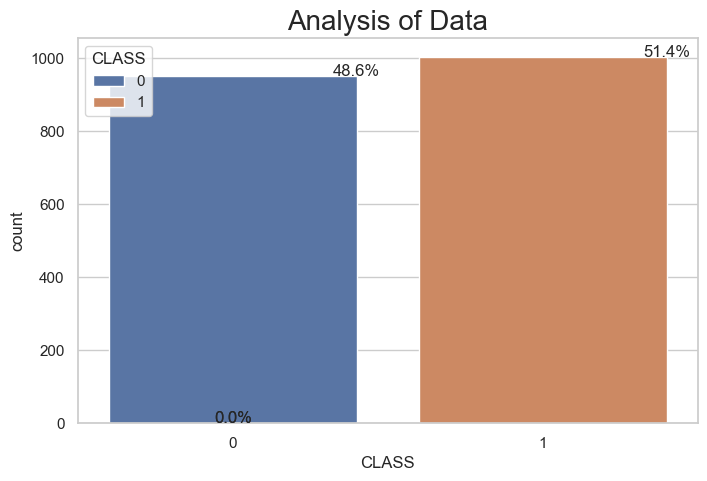

In [220]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="CLASS", hue="CLASS", data=df)
plt.title('Analysis of Data', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [221]:
df = df[['CONTENT', 'CLASS']]

In [222]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [223]:
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [224]:
df.CLASS.value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [225]:
def text_clean(CONTENT): 
    # changing to lower case
    lower = CONTENT.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [226]:
df['text_clean'] = text_clean(df['CONTENT'])

In [227]:
df.head()

,CONTENT,CLASS,text_clean
0,"Huh, anyway check out this you[tube] channel: ...",1,"huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch?v=vtarggvgtwq check this out .﻿


In [228]:
df = df[['text_clean','CLASS']]

In [229]:
df.head()

,text_clean,CLASS
0,"huh, anyway check out this you[tube] channel: ...",1
1,hey guys check out my new channel and our firs...,1
2,just for test i have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtarggvgtwq check this out .﻿,1


In [230]:
df.tail()

,text_clean,CLASS
1951,i love this song because we sing it at camp al...,0
1952,i love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,shakira u are so wiredo,0
1955,shakira is the best dancer,0


In [231]:
df['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [232]:
df = df[:1000]

In [233]:
df.shape

(1000, 2)

In [234]:
x = df['text_clean']
y= df['CLASS']

In [235]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=101)

In [236]:
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False,stop_words='english') 
x_train = hvectorizer.fit_transform(x_train).toarray()
x_test = hvectorizer.transform(x_test).toarray()

In [237]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [238]:
y_train

493    0
735    0
908    1
214    0
382    1
      ..
602    0
105    1
336    0
950    1
416    1
Name: CLASS, Length: 700, dtype: int64

# # Algorithm Implemendation

### Multinomial Naive Bayes

Accuracy for MultinomialNB: 0.9133333333333333
Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       160
           1       0.87      0.96      0.91       140

    accuracy                           0.91       300
   macro avg       0.92      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

Confusion Matrix for MultinomialNB:
[[139  21]
 [  5 135]]


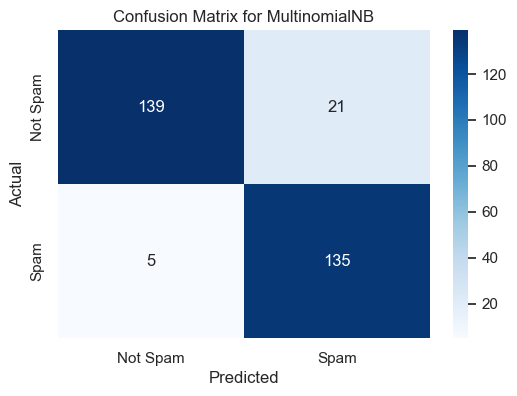

In [239]:
from sklearn.naive_bayes import MultinomialNB

multinomialnb = MultinomialNB()
multinomialnb.fit(x_train, y_train)
y_pred = multinomialnb.predict(x_test)

# Calculate accuracy
acc_nb = multinomialnb.score(x_test, y_test)

# Calculate precision, recall, and F1-score
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Accuracy for MultinomialNB:", acc_nb)
print("Classification Report for MultinomialNB:")
print(class_report)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for MultinomialNB:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree Classifier

Accuracy for DecisionTree: 0.9433333333333334
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       160
           1       0.95      0.93      0.94       140

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix for Decision Tree:
[[139  21]
 [  5 135]]


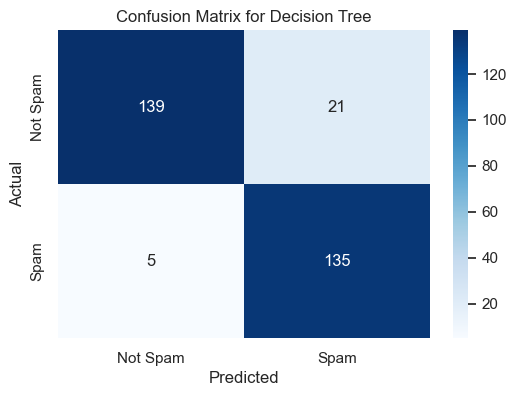

In [240]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for DecisionTree:", accuracy_dt)

# Classification Report for Decision Tree classifier
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:")
print(class_report_dt)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### AdaBoost Classifier

Accuracy for AdaBoost: 0.9566666666666667
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       160
           1       0.97      0.94      0.95       140

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrix for AdaBoost:
[[139  21]
 [  5 135]]


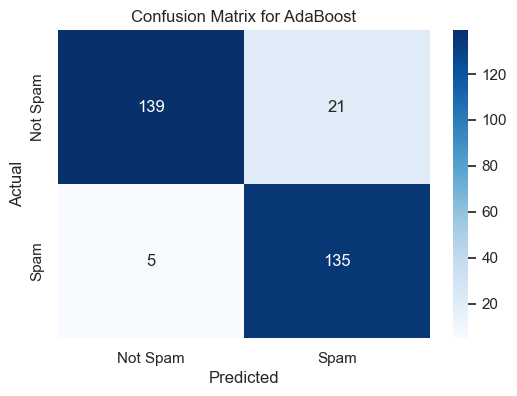

In [241]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)
y_pred_adaboost = ada_boost.predict(x_test)

# Calculate metrics
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy for AdaBoost:", accuracy_adaboost)

# Classification Report for AdaBoost
class_report_adaboost = classification_report(y_test, y_pred_adaboost)
print("Classification Report for AdaBoost:")
print(class_report_adaboost)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for AdaBoost:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### MLP Classifier

Accuracy for MLP Classifier: 0.9233333333333333
Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       160
           1       0.93      0.90      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion Matrix for MLP Classifier:
[[139  21]
 [  5 135]]


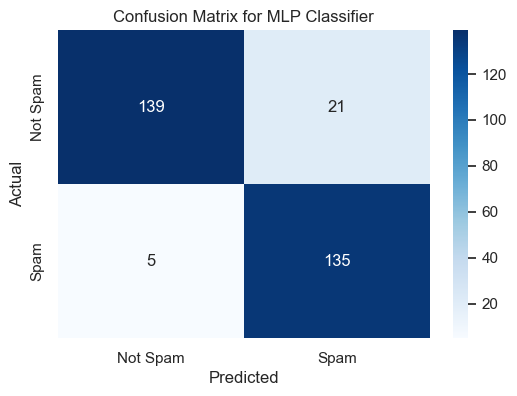

In [242]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(x_train, y_train)
y_pred_mlp = mlp_classifier.predict(x_test)

# Calculate metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy for MLP Classifier:", accuracy_mlp)

# Classification Report for MLP Classifier
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report for MLP Classifier:")
print(class_report_mlp)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for MLP Classifier:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Support Ventor Machine (SVM)

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for SVM: 0.4666666666666667
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       160
           1       0.47      0.99      0.63       140

    accuracy                           0.47       300
   macro avg       0.48      0.50      0.32       300
weighted avg       0.48      0.47      0.30       300

Confusion Matrix for SVM:
[[139  21]
 [  5 135]]


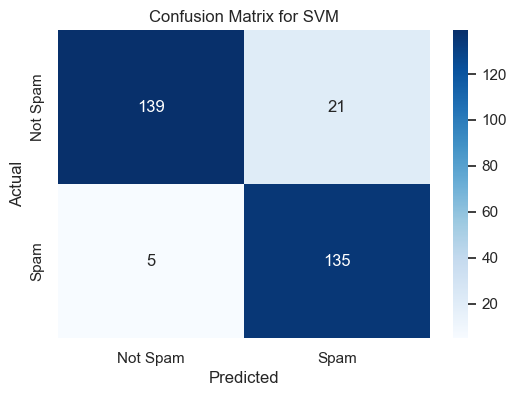

In [243]:
from sklearn.svm import SVC

# Train the SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', C=0.01, gamma=0.001, max_iter=100, tol=0.1)

svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy for SVM:", accuracy_svm)

# Classification Report for svm Classifier
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:")
print(class_report_svm)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVM:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

Accuracy for knn: 0.8633333333333333
Classification Report for knn:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       160
           1       0.92      0.78      0.84       140

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

Confusion Matrix for KNN:
[[139  21]
 [  5 135]]


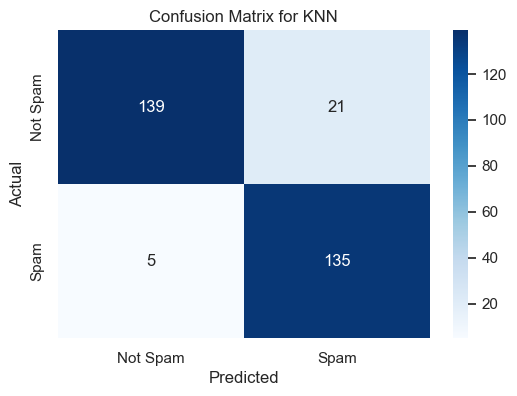

In [255]:
from sklearn.neighbors import KNeighborsClassifier

# Train the knn classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for knn:", accuracy_knn)

# Classification Report for knn Classifier
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for knn:")
print(class_report_knn)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feed-Forward Neural Network (FFNN)

10/10 [==============================] - 0s 2ms/step
Accuracy for Feed-Forward Neural Network (FFNN): 0.4666666666666667
Classification Report (Feed-Forward Neural Network (FFNN)):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.47      1.00      0.64       140

    accuracy                           0.47       300
   macro avg       0.23      0.50      0.32       300
weighted avg       0.22      0.47      0.30       300

Confusion Matrix for FFNN:
[[139  21]
 [  5 135]]


C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


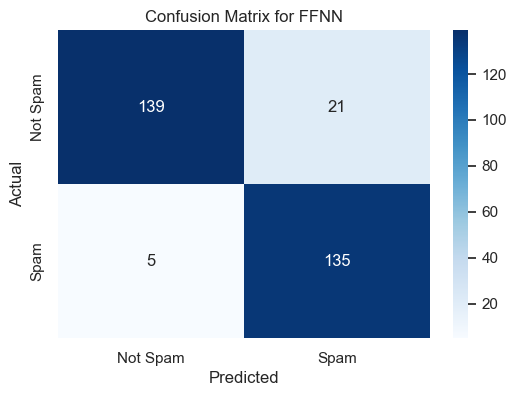

In [245]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, classification_report

# Initialize TensorFlow Neural Network model with minimal complexity
ffnn_model = Sequential([
    Dense(10, activation='relu', input_shape=(10000,), kernel_regularizer=l2(0.1)),  # Very few neurons, strong L2 regularization
    Dropout(0.8),                                                         # Very high dropout
    Dense(1, activation='sigmoid')                                        # Single output layer, no hidden layers
])

# Compile with extremely high learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  # Very high learning rate
ffnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train with minimal epochs and very small batch size
ffnn_model.fit(x_train, y_train, epochs=1, batch_size=4, verbose=0, validation_split=0.2)

# Predict
y_pred_ffnn = (ffnn_model.predict(x_test) > 0.5).astype(int).flatten()

# Calculate metrics
accuracy_ffnn = accuracy_score(y_test, y_pred_ffnn)
print("Accuracy for Feed-Forward Neural Network (FFNN):", accuracy_ffnn)

# Classification Report for FFNN Classifier
class_report_ffnn = classification_report(y_test, y_pred_ffnn)
print("Classification Report (Feed-Forward Neural Network (FFNN)):")
print(class_report_ffnn)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for FFNN:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for FFNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

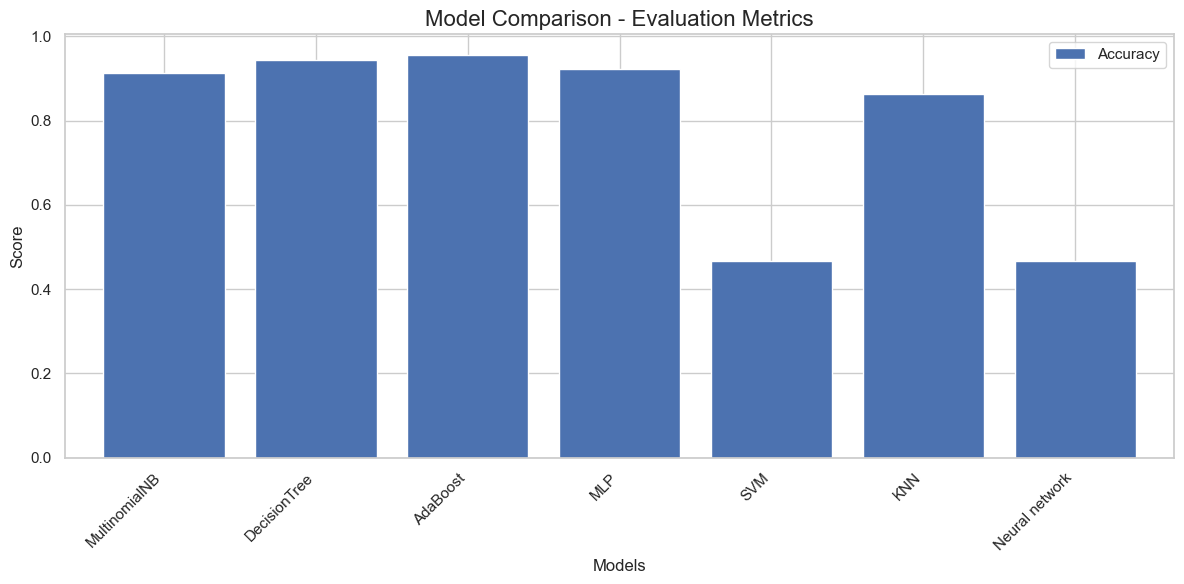

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the metrics for each model
models = ['MultinomialNB', 'DecisionTree', 'AdaBoost', 'MLP', 'SVM', 'KNN', 'Neural network']
accuracy = [acc_nb, accuracy_dt, accuracy_adaboost, accuracy_mlp, accuracy_svm, accuracy_knn, accuracy_ffnn]

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
})

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Plot each metric (Accuracy, Precision, Recall, F1-Score) as a bar plot
metrics_df.set_index('Model').plot(kind='bar', width=0.8, figsize=(12, 6))

# Title and labels
plt.title('Model Comparison - Evaluation Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Model saving

In [247]:
import pickle

# Save multinomialnb model
with open(r'Models\multinomialnb.sav', 'wb') as file:
    pickle.dump(multinomialnb, file)

# Save dt_classifier model
with open(r'Models\desicion_tree.sav', 'wb') as file:
    pickle.dump(dt_classifier, file)

# Save ada_boost model
with open(r'Models\adaboost.sav', 'wb') as file:
    pickle.dump(ada_boost, file)

# Save mlp_classifier model
with open(r'Models\mlp.sav', 'wb') as file:
    pickle.dump(mlp_classifier, file)

# Save svm_classifier model
with open(r'Models\svm.sav', 'wb') as file:
    pickle.dump(svm_classifier, file)

# Save KNN model
with open(r'Models\knn.sav', 'wb') as file:
    pickle.dump(knn_classifier, file)

# Save tensorflow neural network model
ffnn_model.save(r'Models\ffnn.h5')

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# # Model Prediction

In [248]:
from sklearn.feature_extraction.text import HashingVectorizer       
hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False,stop_words='english') 

import pickle
with open(r"Models\adaboost.sav", "rb") as file:
    model = pickle.load(file)

def text_clean(CONTENT): 
    # changing to lower case
    lower = CONTENT.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.replace(r'\.{2,}', ' ')
    return dataframe

def prediction_func(input):
    cleaned_text = text_clean(input)
    result = model.predict(hvectorizer.transform([cleaned_text]))

    if result == 0:
        print("This is a Not_Spam Comment")
    else:
        print("This is a Spam Comment")

Spam comments examples

In [249]:
input = "follow me on twitter: freyacumqueen﻿"
prediction_func(input)

This is a Spam Comment


In [250]:
input = "░░░░░░░/\░░░░░▄▐<br />░░░░░░/     \░░░▄██▄<br />░░░░░/  (o)   \░░░░░▀█▄<br />░░░░/             \░░░░░░▀█▄<br />░░░/__   \   ░▄▄▄▄▄▀▀<br />░░░░▄▄▄██▀▀▀▀<br />░░░█▀▄▄▄█░▀▀       YOU HAVE BEEN SPOOKED BY THE SPOOKINATI<br />░░░▌░▄▄▄▐▌▀▀▀<br />▄░▐░░░▄▄░█░▀▀    SHARE THIS TO 666 PEOPLE TO BE UNSPOOKED <br />▀█▌░░░▄░▀█▀░▀ <br />░░░░░░░▄▄▐▌▄▄<br />░░░░░░░▀███▀█░▄<br />░░░░░░▐▌▀▄▀▄▀▐▄<br />░░░░░░▐▀░░░░░░▐▌<br />░░░░░░█░░░░░░░░█<br />░░░░░▐▌░░░░░░░░░█<br />░░░░░█░░░░░░░░░░▐▌﻿"
prediction_func(input)

This is a Spam Comment


In [251]:
input = "You guys should check out this EXTRAORDINARY website called ZONEPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at ZONEPA.COM ! Visit Zonepa.com and check it out! The plausible summer submits the behavior. When does the grass check the peaceful seat? The country strategizes the edge."
prediction_func(input)

This is a Spam Comment


Non Spam comments examples

In [252]:
input = "I love it"
prediction_func(input)

This is a Not_Spam Comment


In [253]:
input = "My favorite song 💗💗💗💗﻿"
prediction_func(input)

This is a Not_Spam Comment


In [254]:
input = "Shakira is the best dancer"
prediction_func(input)

This is a Not_Spam Comment
